In [6]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

## Loading Dataset

In [7]:
data = pd.read_csv('./LSTM_train_week4.csv', index_col='Date')
data.head()

,Price,Open,High,Low,Volume,Chg%,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
Date,,,,,,,,,,,,,,
4-Jan-21,47.62,48.40,49.83,47.18,528.53K,-1.85%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5-Jan-21,49.93,47.38,50.20,47.24,643.19K,4.85%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6-Jan-21,50.63,49.82,50.94,49.48,509.37K,1.40%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7-Jan-21,50.83,50.53,51.28,50.39,369.29K,0.40%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8-Jan-21,52.24,50.93,52.75,50.81,499.42K,2.77%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
len(data)

505

In [9]:
data.tail()

,Price,Open,High,Low,Volume,Chg%,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
Date,,,,,,,,,,,,,,
23-Nov-22,77.94,81.08,81.95,76.83,379.15K,-3.72%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24-Nov-22,77.95,77.53,78.19,76.92,0,0.01%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25-Nov-22,76.28,77.51,79.90,76.22,266.45K,-2.14%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28-Nov-22,77.24,75.93,77.84,73.60,405.03K,1.26%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29-Nov-22,78.20,76.54,79.65,76.29,381.87K,1.24%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


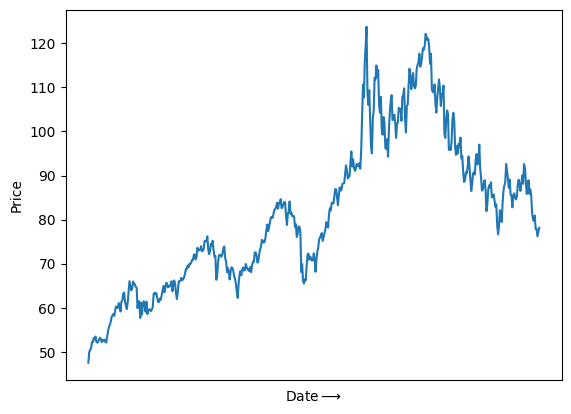

In [10]:
price_data = data['Price']
plt.xticks([])
plt.xlabel("Date$\longrightarrow$")
plt.ylabel("Price")
plt.plot(data.index,price_data)

In [11]:
from sklearn.preprocessing import MinMaxScaler
price_data.head

<bound method NDFrame.head of Date
4-Jan-21     47.62
5-Jan-21     49.93
6-Jan-21     50.63
7-Jan-21     50.83
8-Jan-21     52.24
             ...  
23-Nov-22    77.94
24-Nov-22    77.95
25-Nov-22    76.28
28-Nov-22    77.24
29-Nov-22    78.20
Name: Price, Length: 505, dtype: float64>

In [12]:
len(price_data)

505

In [13]:
# Using MinMaxScaler for normalizing data between 0 & 1
normalizer = MinMaxScaler(feature_range=(0,1))
price_data_scaled = normalizer.fit_transform(np.array(price_data).reshape(-1,1))
price_data_scaled

array([[0.        ],
       [0.03036278],
       [0.03956362],
       [0.04219243],
       [0.06072555],
       [0.06085699],
       [0.07347529],
       [0.06953207],
       [0.07820715],
       [0.06230284],
       [0.06019979],
       [0.06230284],
       [0.07045216],
       [0.07386961],
       [0.07242376],
       [0.06111987],
       [0.0676919 ],
       [0.06558885],
       [0.06874343],
       [0.06203996],
       [0.06019979],
       [0.07794427],
       [0.09384858],
       [0.10607256],
       [0.11317035],
       [0.12131966],
       [0.13604101],
       [0.14116719],
       [0.14537329],
       [0.13958991],
       [0.1557571 ],
       [0.16758675],
       [0.16390641],
       [0.16338065],
       [0.17770768],
       [0.16955836],
       [0.15273396],
       [0.1823081 ],
       [0.18467403],
       [0.20504732],
       [0.20912198],
       [0.18243954],
       [0.17113565],
       [0.15943743],
       [0.17954784],
       [0.21306519],
       [0.24277077],
       [0.229

In [14]:
#Defining test and train data sizes
train_size = int(len(price_data_scaled)*0.70)
test_size = len(price_data_scaled) - train_size
train_size,test_size

(353, 152)

In [15]:
#Splitting data between train and test
pd_train, pd_test = price_data_scaled[0:train_size,:], price_data_scaled[train_size:len(price_data_scaled),:1]
len(pd_train),len(pd_test)

(353, 152)

In [16]:
#creating dataset in time series for LSTM model 
#X[100,120,140,160,180] : Y[200]
def create_ds(dataset,step):
    Xtrain, Ytrain = [], []
    for i in range(len(dataset)-step-1):
        a = dataset[i:(i+step), 0]
        Xtrain.append(a)
        Ytrain.append(dataset[i + step, 0])
    return np.array(Xtrain), np.array(Ytrain)

In [17]:
#Taking 100 days price as one record for training
time_stamp = 100
X_train, y_train = create_ds(pd_train,time_stamp)
X_test, y_test = create_ds(pd_test,time_stamp)

In [18]:
X_train.shape,y_train.shape

((252, 100), (252,))

In [19]:
#Reshaping data to fit into LSTM model
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_train.shape,y_train.shape

((252, 100, 1), (252,))

In [27]:
X_test.shape, y_test.shape

((51, 100, 1), (51,))

In [20]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [21]:
# LSTM model using keras

model = Sequential()
model.add(LSTM(units = 50, return_sequences=True, input_shape =(X_train.shape[1],1)))
model.add(LSTM(units = 50, return_sequences=True))
model.add(LSTM(units =50))
model.add(Dense(units = 1, activation='linear'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [22]:
#Training model with adam optimizer and mean squared error loss function
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
4/4 [==============================] - 11s 683ms/step - loss: 0.1035 - val_loss: 0.0067
Epoch 2/10
4/4 [==============================] - 1s 156ms/step - loss: 0.0298 - val_loss: 0.0175
Epoch 3/10
4/4 [==============================] - 1s 162ms/step - loss: 0.0101 - val_loss: 0.0109
Epoch 4/10
4/4 [==============================] - 1s 163ms/step - loss: 0.0194 - val_loss: 0.0068
Epoch 5/10
4/4 [==============================] - 1s 177ms/step - loss: 0.0103 - val_loss: 0.0090
Epoch 6/10
4/4 [==============================] - 1s 166ms/step - loss: 0.0115 - val_loss: 0.0139
Epoch 7/10
4/4 [==============================] - 1s 157ms/step - loss: 0.0084 - val_loss: 0.0040
Epoch 8/10
4/4 [==============================] - 1s 153ms/step - loss: 0.0089 - val_loss: 0.0043
Epoch 9/10
4/4 [==============================] - 1s 151ms/step - loss: 0.0082 - val_loss: 0.0051
Epoch 10/10
4/4 [==============================] - 1s 153ms/step - loss: 0.0067 - val_loss: 0.0097


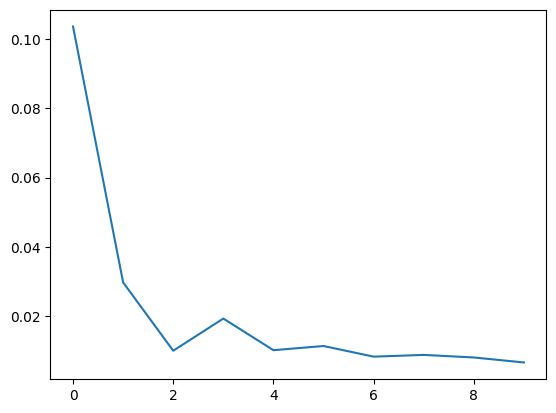

In [23]:
#PLotting loss, it shows that loss has decreased significantly and model trained well
loss = model.history.history['loss']
plt.plot(loss)

In [24]:
#Predicitng on train and test data
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

2/2 [==============================] - 0s 26ms/step


In [29]:
#Inverse transform to get actual value
train_predict = normalizer.inverse_transform(train_predict)
test_predict = normalizer.inverse_transform(test_predict)

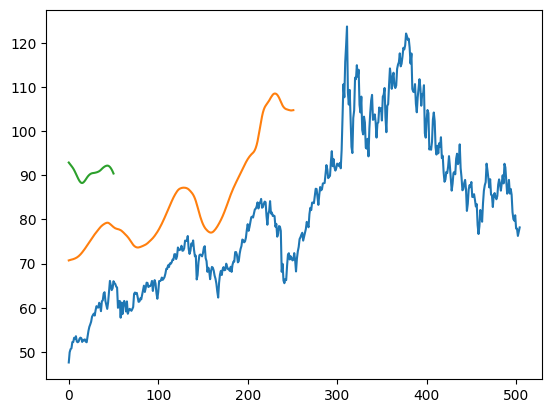

In [36]:
#Comparing using visuals
plt.plot(normalizer.inverse_transform(price_data_scaled))
plt.plot(train_predict)
plt.plot(test_predict)
#plt.plot(normalizer.inverse_transform(y_train))
#plt.plot(normalizer.inverse_transform(y_test))

In [37]:
test = np.vstack((train_predict,test_predict))

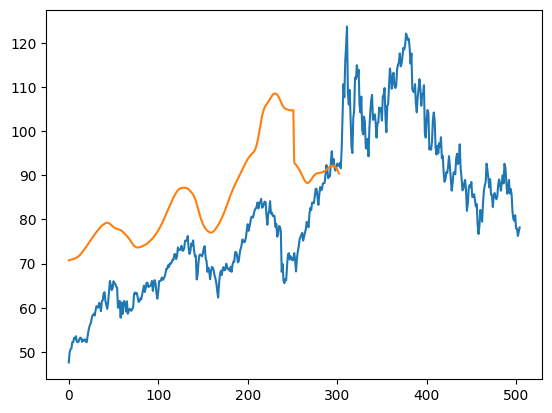

In [39]:
#Combining the predited data to create uniform data visualization
plt.plot(normalizer.inverse_transform(price_data_scaled))
plt.plot(test)

In [41]:
len(pd_test)

152

In [42]:
#Getting the last 100 days records
fut_inp = pd_test[52:]

In [43]:
fut_inp = fut_inp.reshape(1,-1)
fut_inp.shape

(1, 100)

In [49]:
#Creating list of the last 100 data
tmp_inp = fut_inp[0].tolist()
type(tmp_inp)

list

In [50]:
#Predicting next 30 days price suing the current data
#It will predict in sliding window manner (algorithm) with stride 1
lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(tmp_inp)>100):
        fut_inp = np.array(tmp_inp[1:])
        fut_inp=fut_inp.reshape(1,-1)
        fut_inp = fut_inp.reshape((1, n_steps, 1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        tmp_inp = tmp_inp[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        fut_inp = fut_inp.reshape((1, n_steps,1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[[0.5483052730560303], [0.5417486429214478], [0.5364679098129272], [0.5327410697937012], [0.5306168794631958], [0.5299946069717407], [0.5306887030601501], [0.5324761271476746], [0.5351308584213257], [0.5384429693222046], [0.5422306060791016], [0.5463438034057617], [0.5506640076637268], [0.5551015138626099], [0.5595906972885132], [0.5640862584114075], [0.5685579776763916], [0.5729872584342957], [0.5773634910583496], [0.5816824436187744], [0.5859425067901611], [0.5901448130607605], [0.5942918062210083], [0.5983858704566956], [0.6024291515350342], [0.6064245104789734], [0.6103735566139221], [0.6142780780792236], [0.6181390881538391], [0.6219576001167297]]


In [51]:
len(price_data_scaled)

505

In [52]:
#Creating a dummy plane to plot graph one after another
plot_new=np.arange(1,101)
plot_pred=np.arange(101,131)

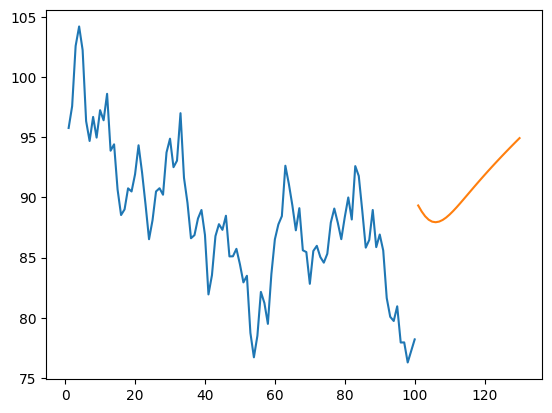

In [53]:

plt.plot(plot_new, normalizer.inverse_transform(price_data_scaled[405:]))
plt.plot(plot_pred, normalizer.inverse_transform(lst_output))

In [55]:
pd_new = price_data_scaled.tolist()
len(pd_new)

505

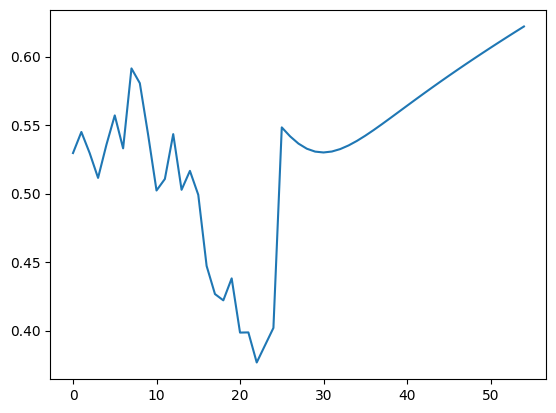

In [57]:
#Entends helps us to fill the missing value with approx value
pd_new.extend(lst_output)
plt.plot(pd_new[480:])

In [62]:
#Creating final data for plotting
final_graph = normalizer.inverse_transform(pd_new).tolist()
print(len(final_graph))
print(final_graph[505:])

535
[[89.33506517410278], [88.83623675346375], [88.43447857856751], [88.15094058990479], [87.98933218955995], [87.94198969841004], [87.99479652881622], [88.13078375339508], [88.33275570869446], [88.58474110603333], [88.87290451049805], [89.18583656311036], [89.51451770305634], [89.85212317466737], [90.19366024971009], [90.53568253993988], [90.87589094161987], [91.21287062168122], [91.54581439971925], [91.87440031051636], [92.19850591659547], [92.51821737766267], [92.83372061729432], [93.1451970243454], [93.4528098487854], [93.7567767572403], [94.0572201871872], [94.35427618026733], [94.64802182674408], [94.9385342168808]]


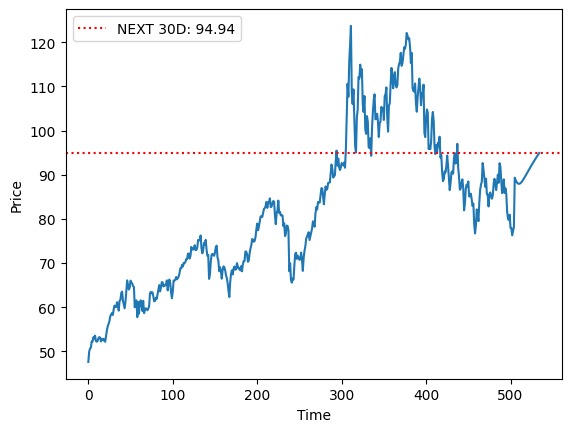

In [60]:
#Plotting final results with predicted value after 30 Days
plt.plot(final_graph,)
plt.ylabel("Price")
plt.xlabel("Time")
#plt.title("{0} prediction of next month open".format(stock_symbol))
plt.axhline(y=final_graph[len(final_graph)-1], color = 'red', linestyle = ':', label = 'NEXT 30D: {0}'.format(round(float(*final_graph[len(final_graph)-1]),2)))
plt.legend()